# Support Vector Regressor (SVR) and 
# Random Forest (RF) Model Development

### Import necessary modules

In [1]:
import joblib
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

## Load the dataset

In [2]:
data_file = "./RFModelDev/Datasets/final_wholesale_retail_dataset_v0.0.csv"
dataset = pd.read_csv(data_file)

# Display the first few rows of the dataset to get an overview
print(dataset.head())

   year  month     location  wholesale_price  retail_price
0  2017      1  Keppetipola            45.42          98.0
1  2017      1   Kurunegala            61.00         103.0
2  2017      1       Ampara            73.91         124.8
3  2017      1       Matale            68.94         116.4
4  2017      1     Vavuniya            46.19          78.0


### Get unique locations before encoding

In [3]:
# Get unique locations before encoding
unique_locations_before_encoding = dataset['location'].unique()

# Display unique locations before encoding
print("Unique Locations Before Encoding:")
print(unique_locations_before_encoding)

Unique Locations Before Encoding:
['Keppetipola' 'Kurunegala' 'Ampara' 'Matale' 'Vavuniya' 'Mannar' 'Trinco'
 'Matara' 'Bandarawela' 'Dehiattakandiya' 'Nikaweratiya' 'Embilipitiya'
 'Dabulla' 'Hanguranketha' 'Galle' 'Thabuththegama' 'Thissamaharama'
 'Kandy' 'Polonnaruwa' 'Galenbidunuwewa' 'Kilinochchi' 'Kegalle'
 'Nuwara Eliya' 'Rathnapura' 'Mullathivu' 'Jaffna' 'Puttalam' 'Gampaha'
 'Kaluthara' 'Batticaloa' 'Meegoda' 'Badulla' 'Hambanthota' 'Monaragala'
 'Colombo' 'Veyangoda' 'Anuradapuraya']


### Separate independent (X) and dependent (y) variables

In [4]:
X = dataset.iloc[:, :-2]  # Select all columns except the last two
y = dataset.iloc[:, -2:]  # Select the last two columns

# Display the first few rows of X and y
print("\nIndependent variables (X):")
print(X.head())

print("\nDependent variables (y):")
print(y.head())


Independent variables (X):
   year  month     location
0  2017      1  Keppetipola
1  2017      1   Kurunegala
2  2017      1       Ampara
3  2017      1       Matale
4  2017      1     Vavuniya

Dependent variables (y):
   wholesale_price  retail_price
0            45.42          98.0
1            61.00         103.0
2            73.91         124.8
3            68.94         116.4
4            46.19          78.0


## One-Hot Encoding for the 'location' column

In [5]:
encoder = OneHotEncoder(sparse_output=False)
X_encoded = encoder.fit_transform(X[['location']])
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(['location']))

## Simplify header names by keeping only city names
X_encoded_df.columns = X_encoded_df.columns.str.split('_').str[-1]
X.drop(columns=['location'], inplace=True)  # Drop the original 'location' column
X = pd.concat([X, X_encoded_df], axis=1)  # Concatenate the encoded 'location' columns

### Get unique locations after encoding

In [6]:
# Display unique locations after encoding
print("\nUnique Locations After Encoding:")
print(X_encoded_df.columns)


Unique Locations After Encoding:
Index(['Ampara', 'Anuradapuraya', 'Badulla', 'Bandarawela', 'Batticaloa',
       'Colombo', 'Dabulla', 'Dehiattakandiya', 'Embilipitiya',
       'Galenbidunuwewa', 'Galle', 'Gampaha', 'Hambanthota', 'Hanguranketha',
       'Jaffna', 'Kaluthara', 'Kandy', 'Kegalle', 'Keppetipola', 'Kilinochchi',
       'Kurunegala', 'Mannar', 'Matale', 'Matara', 'Meegoda', 'Monaragala',
       'Mullathivu', 'Nikaweratiya', 'Nuwara Eliya', 'Polonnaruwa', 'Puttalam',
       'Rathnapura', 'Thabuththegama', 'Thissamaharama', 'Trinco', 'Vavuniya',
       'Veyangoda'],
      dtype='object')


## Standardization

In [7]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
y = pd.DataFrame(scaler.fit_transform(y), columns=y.columns)

# Display the first few rows of the updated X and y
print("\nUpdated Independent variables (X) after encoding and standardization:")
print(X.head())

print("\nUpdated Dependent variables (y) after standardization:")
print(y.head())


Updated Independent variables (X) after encoding and standardization:
       year     month    Ampara  Anuradapuraya   Badulla  Bandarawela  \
0 -1.451288 -1.597845 -0.166699      -0.166699 -0.166699    -0.166699   
1 -1.451288 -1.597845 -0.166699      -0.166699 -0.166699    -0.166699   
2 -1.451288 -1.597845  5.998826      -0.166699 -0.166699    -0.166699   
3 -1.451288 -1.597845 -0.166699      -0.166699 -0.166699    -0.166699   
4 -1.451288 -1.597845 -0.166699      -0.166699 -0.166699    -0.166699   

   Batticaloa   Colombo   Dabulla  Dehiattakandiya  ...  Nikaweratiya  \
0   -0.166699 -0.166699 -0.166699        -0.166699  ...     -0.166699   
1   -0.166699 -0.166699 -0.166699        -0.166699  ...     -0.166699   
2   -0.166699 -0.166699 -0.166699        -0.166699  ...     -0.166699   
3   -0.166699 -0.166699 -0.166699        -0.166699  ...     -0.166699   
4   -0.166699 -0.166699 -0.166699        -0.166699  ...     -0.166699   

   Nuwara Eliya  Polonnaruwa  Puttalam  Rathnapura 

### Display the list of feature names

In [8]:
# Display the list of feature names
print("List of Features After Encoding:")
print(X.columns.tolist())

List of Features After Encoding:
['year', 'month', 'Ampara', 'Anuradapuraya', 'Badulla', 'Bandarawela', 'Batticaloa', 'Colombo', 'Dabulla', 'Dehiattakandiya', 'Embilipitiya', 'Galenbidunuwewa', 'Galle', 'Gampaha', 'Hambanthota', 'Hanguranketha', 'Jaffna', 'Kaluthara', 'Kandy', 'Kegalle', 'Keppetipola', 'Kilinochchi', 'Kurunegala', 'Mannar', 'Matale', 'Matara', 'Meegoda', 'Monaragala', 'Mullathivu', 'Nikaweratiya', 'Nuwara Eliya', 'Polonnaruwa', 'Puttalam', 'Rathnapura', 'Thabuththegama', 'Thissamaharama', 'Trinco', 'Vavuniya', 'Veyangoda']


## Train & Test Split

In [9]:
## Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Calculate the percentage of train and test set
total_samples = len(X)
train_samples = len(X_train)
test_samples = len(X_test)

train_percentage = (train_samples / total_samples) * 100
test_percentage = (test_samples / total_samples) * 100

print(f"Train set percentage: {train_percentage:.2f}%")
print(f"Test set percentage: {test_percentage:.2f}%")

Train set percentage: 79.97%
Test set percentage: 20.03%


## SVR Model Development for Multi-Output Regression

In [10]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define SVR model with hyperparameters
svr_model = SVR(kernel='rbf', C=4.0, epsilon=0.6)

# Wrap the SVR model for multi-output regression
multioutput_svr_model = MultiOutputRegressor(svr_model)

# Train the multi-output SVR model
multioutput_svr_model.fit(X_train, y_train)

# Predict both 'wholesale_price' and 'retail_price' for the train and test sets
y_train_pred = multioutput_svr_model.predict(X_train)
y_test_pred = multioutput_svr_model.predict(X_test)

# Calculate RMSE and R-squared for train and test sets
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("\nSVR Model - Train RMSE: {:.2f}".format(train_rmse))
print("SVR Model - Test RMSE: {:.2f}".format(test_rmse))
print("SVR Model - Train R-squared: {:.2f}".format(train_r2))
print("SVR Model - Test R-squared: {:.2f}".format(test_r2))


SVR Model - Train RMSE: 0.69
SVR Model - Test RMSE: 0.70
SVR Model - Train R-squared: 0.53
SVR Model - Test R-squared: 0.44


## Random Forest Model Development for Multi-Output Regression

In [11]:
from sklearn.ensemble import RandomForestRegressor

# Define Random Forest model with hyperparameters
rf_model = RandomForestRegressor(n_estimators=100, bootstrap=True,
                                    max_depth=None, random_state=42)

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Predict both 'wholesale_price' and 'retail_price' for the train and test sets
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

# Calculate RMSE and R-squared for Random Forest model on train and test sets
train_rmse_rf = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
test_rmse_rf = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))

train_r2_rf = r2_score(y_train, y_train_pred_rf)
test_r2_rf = r2_score(y_test, y_test_pred_rf)

print("\nRF Model - Train RMSE: {:.2f}".format(train_rmse_rf))
print("RF Model - Test RMSE: {:.2f}".format(test_rmse_rf))
print("RF Model - Train R-squared: {:.2f}".format(train_r2_rf))
print("RF Model - Test R-squared: {:.2f}".format(test_r2_rf))


RF Model - Train RMSE: 0.17
RF Model - Test RMSE: 0.42
RF Model - Train R-squared: 0.97
RF Model - Test R-squared: 0.80


## Evaluation Metrix

### Calculate Accuracy in Percentages

In [12]:
# Calculate Accuracy in Percentages
def calculate_accuracy(r2_score):
    return r2_score * 100  # Convert R-squared to percentage

# Calculate accuracy for SVR Model
train_accuracy_svr = calculate_accuracy(train_r2)
test_accuracy_svr = calculate_accuracy(test_r2)

# Calculate accuracy for Random Forest Model
train_accuracy_rf = calculate_accuracy(train_r2_rf)
test_accuracy_rf = calculate_accuracy(test_r2_rf)

# Display the results
print("\nSVR Model - Train Accuracy: {:.2f}%".format(train_accuracy_svr))
print("SVR Model - Test Accuracy: {:.2f}%".format(test_accuracy_svr))
print("\nRF Model - Train Accuracy: {:.2f}%".format(train_accuracy_rf))
print("RF Model - Test Accuracy: {:.2f}%".format(test_accuracy_rf))



SVR Model - Train Accuracy: 53.18%
SVR Model - Test Accuracy: 43.87%

RF Model - Train Accuracy: 97.20%
RF Model - Test Accuracy: 79.71%


### Calculate RMSE in Percentages

In [13]:
# Calculate RMSE in Percentages
def calculate_rmse_percentage(rmse):
    return rmse * 100  # Convert RMSE to percentage

# Calculate RMSE for SVR Model
train_rmse_percentage_svr = calculate_rmse_percentage(train_rmse)
test_rmse_percentage_svr = calculate_rmse_percentage(test_rmse)

# Calculate RMSE for Random Forest Model
train_rmse_percentage_rf = calculate_rmse_percentage(train_rmse_rf)
test_rmse_percentage_rf = calculate_rmse_percentage(test_rmse_rf)

# Display RMSE in percentage form
print("\nSVR Model - Train RMSE (Percentage): {:.2f}%".format(train_rmse_percentage_svr))
print("SVR Model - Test RMSE (Percentage): {:.2f}%".format(test_rmse_percentage_svr))
print("\nRF Model - Train RMSE (Percentage): {:.2f}%".format(train_rmse_percentage_rf))
print("RF Model - Test RMSE (Percentage): {:.2f}%".format(test_rmse_percentage_rf))



SVR Model - Train RMSE (Percentage): 69.44%
SVR Model - Test RMSE (Percentage): 70.26%

RF Model - Train RMSE (Percentage): 17.00%
RF Model - Test RMSE (Percentage): 42.18%


## Comprehensive Evaluation of SVR and RF models

### Residual Plots
- Residual plots are used to check if the errors (residuals) are randomly distributed around zero, which is a key assumption for regression models.

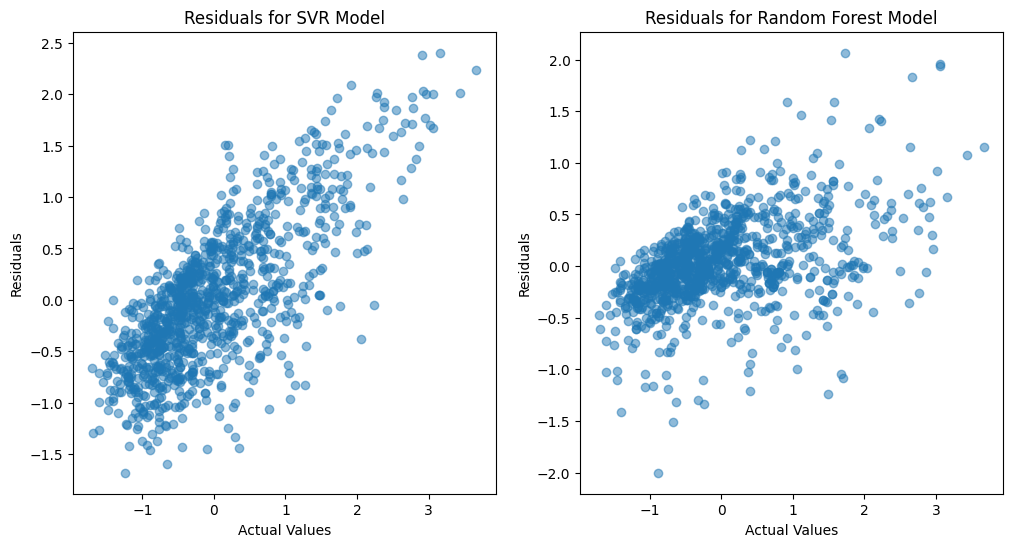

In [14]:
import matplotlib.pyplot as plt

# Calculate residuals for both models
residuals_svr = y_test - y_test_pred
residuals_rf = y_test - y_test_pred_rf

# Create residual plots
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, residuals_svr, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residuals for SVR Model")

plt.subplot(1, 2, 2)
plt.scatter(y_test, residuals_rf, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residuals for Random Forest Model")

plt.show()

### Distribution of Residuals
- Plot the distribution of residuals to check if they follow a normal distribution.

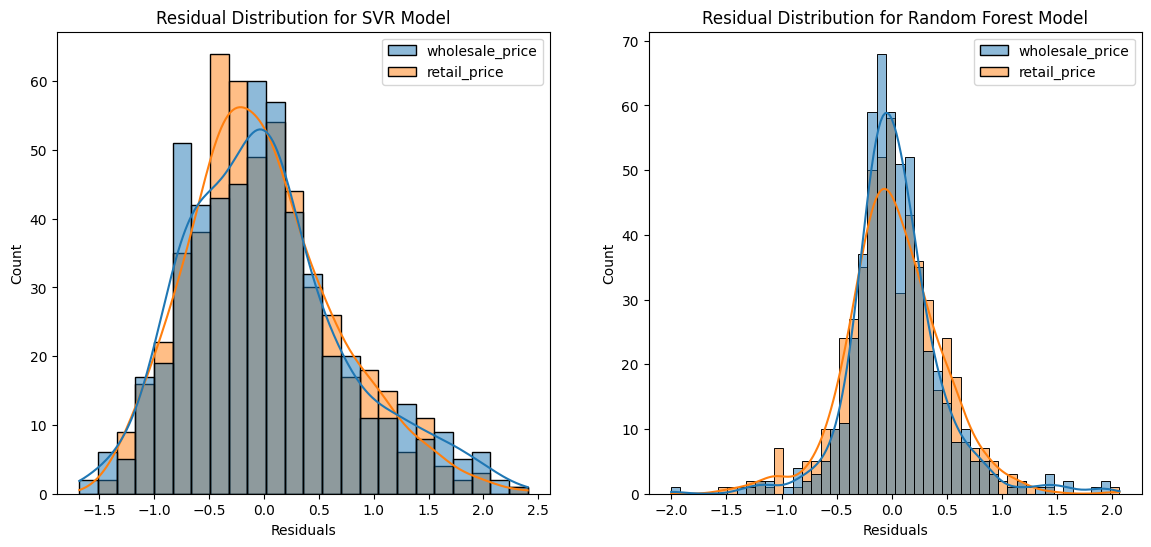

In [15]:
import seaborn as sns

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(residuals_svr, kde=True)
plt.xlabel("Residuals")
plt.title("Residual Distribution for SVR Model")

plt.subplot(1, 2, 2)
sns.histplot(residuals_rf, kde=True)
plt.xlabel("Residuals")
plt.title("Residual Distribution for Random Forest Model")

plt.show()

### Actual vs. Predicted Values
- Plot actual vs. predicted values to visualize how well the models perform.

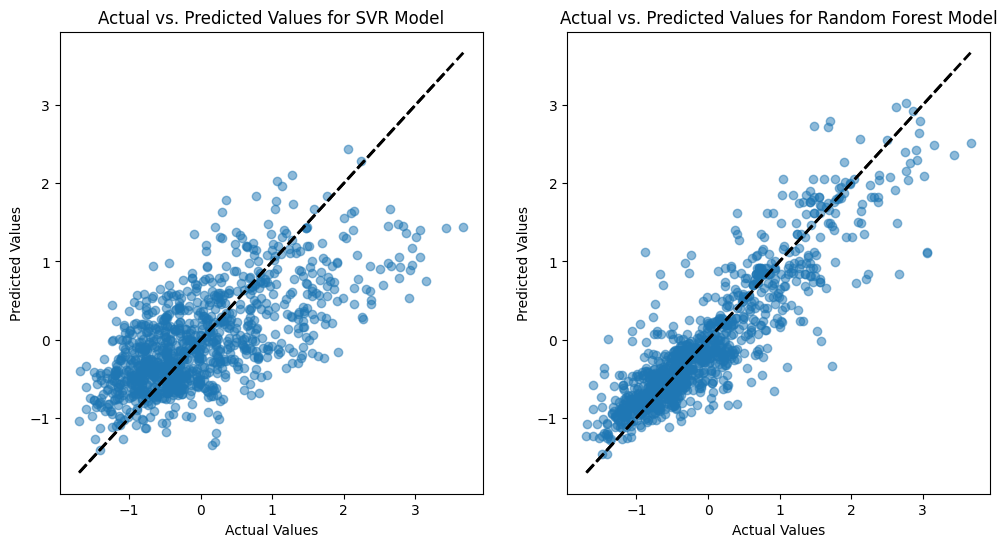

In [16]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values for SVR Model")

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values for Random Forest Model")

plt.show()

### Feature Importance (Random Forest Only)
- Plot feature importances to see which features have the most impact on predictions.

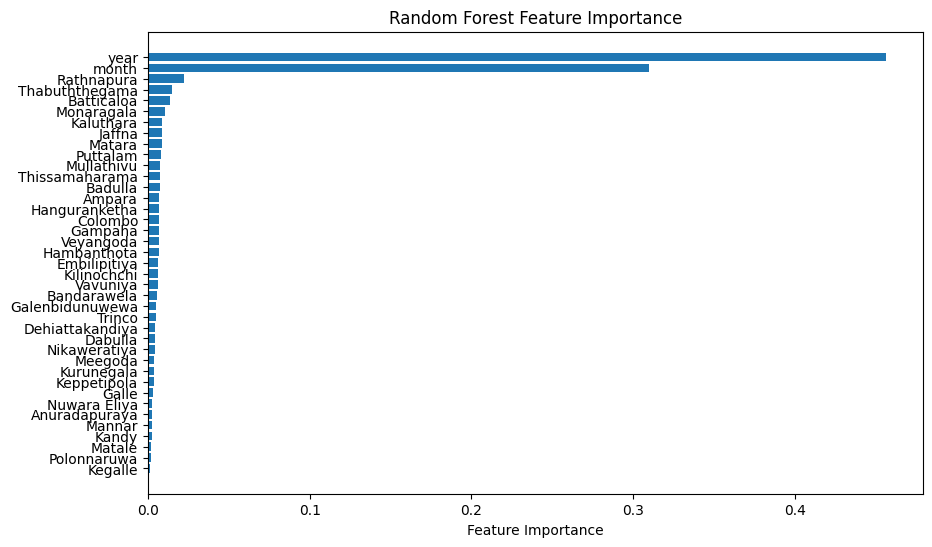

In [17]:
feature_importances = rf_model.feature_importances_
sorted_idx = np.argsort(feature_importances)

plt.figure(figsize=(10, 6))
plt.barh(range(X_train.shape[1]), feature_importances[sorted_idx], align="center")
plt.yticks(range(X_train.shape[1]), X_train.columns[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")

plt.show()

## Save Models

### Save SVR Model

In [18]:
# Save the SVR model to a file
svr_model_filename = './fun1/svr_model.pkl'
joblib.dump(multioutput_svr_model, svr_model_filename)

['./fun1/svr_model.pkl']

### Save Random Forest Model

In [19]:
# Save the Random Forest model to a file
rf_model_filename = './fun1/rf_model.pkl'
joblib.dump(rf_model, rf_model_filename)

['./fun1/rf_model.pkl']

### Save the encoder to a file

In [20]:
encoder_filename = './fun1/encoder.pkl'
joblib.dump(encoder, encoder_filename)

['./fun1/encoder.pkl']

----------------------